<a href="https://colab.research.google.com/github/pateljay7018/CE888-7-SP-D.S.-and-decision-making-/blob/main/Assignment-1/test/UKPolice_Bias.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries & Retrieving Datasets

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#Drive Mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Retriving Data of Police Arrests In UK - 2006/07-2017/18
# Retruved from: https://data.gov.uk/dataset/f92e60cd-ea9d-4561-b8df-ba979bda82eb/arrests-by-ethnicity

ar_df = pd.read_csv('/content/drive/MyDrive/arrests-data-march-2013-to-march-2019.csv')
ar_df.head(5)

,Measure,Time,Time_type,Ethnicity,Ethnicity_type,Gender,Gender_type,Age_Group,Age_Group_type,Geography,Geography_type,Number of arrests,"Population by ethnicity, gender, and PFA (based on 2011 Census)","Rate per 1,000 population by ethnicity, gender, and PFA","Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)",Notes
0,Number of arrests,2018/19,Financial year,All,All,All,Male/Female,10 - 17 years,Arrest age group categories,All,Police Force Area,"60,208",N/A for individual age groups,N/A for individual age groups,N/A for individual age groups,Excludes Lancashire (both arrest and populatio...
1,Number of arrests,2018/19,Financial year,All,All,Female,Male/Female,10 - 17 years,Arrest age group categories,All,Police Force Area,"9,290",N/A for individual age groups,N/A for individual age groups,N/A for individual age groups,Excludes Lancashire (both arrest and populatio...
2,Number of arrests,2018/19,Financial year,All,All,Male,Male/Female,10 - 17 years,Arrest age group categories,All,Police Force Area,"50,918",N/A for individual age groups,N/A for individual age groups,N/A for individual age groups,Excludes Lancashire (both arrest and populatio...
3,Number of arrests,2018/19,Financial year,Any other asian,ONS 2001 16+1,Female,Male/Female,10 - 17 years,Arrest age group categories,All,Police Force Area,75,N/A for individual age groups,N/A for individual age groups,N/A for individual age groups,Excludes Lancashire (both arrest and populatio...
4,Number of arrests,2018/19,Financial year,Any other asian,ONS 2001 16+1,Male,Male/Female,10 - 17 years,Arrest age group categories,All,Police Force Area,941,N/A for individual age groups,N/A for individual age groups,N/A for individual age groups,Excludes Lancashire (both arrest and populatio...


# Data Exploration & Pre-processing

In [ ]:
# Checking datatypes
ar_df.dtypes

Measure                                                                                                                      object
Time                                                                                                                         object
Time_type                                                                                                                    object
Ethnicity                                                                                                                    object
Ethnicity_type                                                                                                               object
Gender                                                                                                                       object
Gender_type                                                                                                                  object
Age_Group                                                                   

In [ ]:
# Dataframe Column Names
ar_df.columns

Index(['Measure', 'Time', 'Time_type', 'Ethnicity', 'Ethnicity_type', 'Gender',
       'Gender_type', 'Age_Group', 'Age_Group_type', 'Geography',
       'Geography_type', 'Number of arrests',
       'Population by ethnicity, gender, and PFA (based on 2011 Census)',
       'Rate per 1,000 population by ethnicity, gender, and PFA',
       'Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)',
       'Notes'],
      dtype='object')

In [ ]:
# Dropping extraneous parameters
na_df = ar_df.drop(columns=['Measure','Time_type','Ethnicity_type','Gender_type','Age_Group_type','Geography_type','Notes']).copy()

# Renaming Parameter Names
na_df.rename(columns={' Number of arrests ':'n_arrests',
                      'Population by ethnicity, gender, and PFA (based on 2011 Census)':'Pop.',
                      'Rate per 1,000 population by ethnicity, gender, and PFA':'Pop_1K',
                      'Proportion of arrests of this ethnicity, in this year, of this gender and in this police force area (excludes unreported)':'Prop_ar'}, inplace=True)
na_df.head(5)

,Time,Ethnicity,Gender,Age_Group,Geography,Number of arrests,Pop.,Pop_1K,Prop_ar
0,2018/19,All,All,10 - 17 years,All,"60,208",N/A for individual age groups,N/A for individual age groups,N/A for individual age groups
1,2018/19,All,Female,10 - 17 years,All,"9,290",N/A for individual age groups,N/A for individual age groups,N/A for individual age groups
2,2018/19,All,Male,10 - 17 years,All,"50,918",N/A for individual age groups,N/A for individual age groups,N/A for individual age groups
3,2018/19,Any other asian,Female,10 - 17 years,All,75,N/A for individual age groups,N/A for individual age groups,N/A for individual age groups
4,2018/19,Any other asian,Male,10 - 17 years,All,941,N/A for individual age groups,N/A for individual age groups,N/A for individual age groups


In [ ]:
# Processing Parameters
# Coverting string object to integer & replacing '-' with np.nan

c_list = na_df.columns[-4:].values
for i in c_list:
 
  na_df[i] = pd.to_numeric(na_df[i],downcast='float',errors='coerce')

# Checking Arrest patterns based on different Parameters
#### This Section will look at number arrests based on the following parameters:


*   Year
*   Enthnicity
*   Gender
*   Age Group
*   Geography



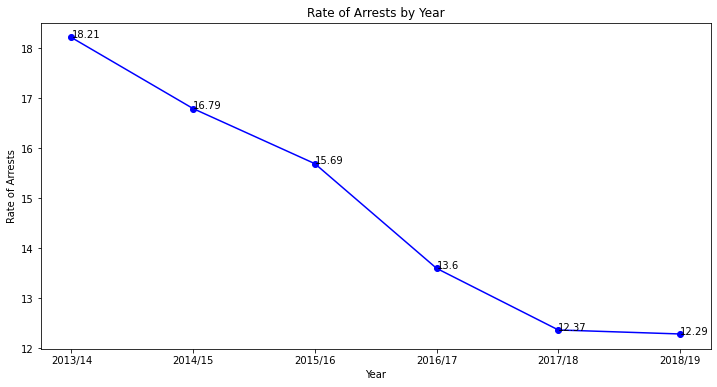

In [ ]:
# Arrests by Year

yearly = na_df.loc[ar_df['Ethnicity'] == 'All'].loc[ar_df['Gender'] == 'All'].loc[ar_df['Age_Group'] == 'All'].loc[ar_df['Geography'] == 'All'].copy()
yearly = yearly[['Time','Pop_1K']].groupby('Time').sum()

# Plotting Values

plt.figure(figsize=(12,6))
plt.plot(yearly.index,yearly['Pop_1K'],marker='o',color='blue')
for i in range(len(yearly)):
  plt.text(yearly.index[i],yearly['Pop_1K'][i],yearly['Pop_1K'][i])
plt.title('Rate of Arrests by Year')
plt.xlabel('Year')
plt.ylabel('Rate of Arrests')
plt.show()

In [ ]:
#Stops By Gender
na_df["Gender"].value_counts()

All       36456
Male      36432
Female    36432
Name: Gender, dtype: int64

IndexError: ignored

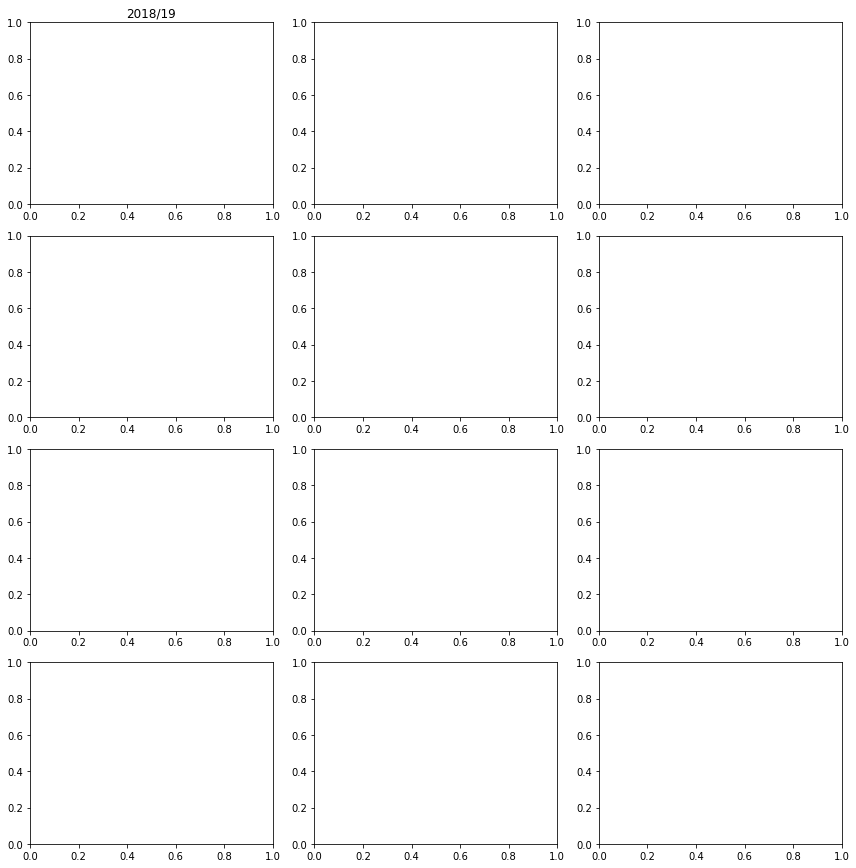

In [ ]:
# Gender Based Arrests By Year

gender = na_df.loc[ar_df['Ethnicity'] == 'All'].loc[ar_df['Gender'] != 'All'].loc[ar_df['Age_Group'] == 'All'].loc[ar_df['Geography'] == 'All']
gender = gender[['Time','Gender']]

# Plotting Values

gd_fig,gd_axes = plt.subplots(figsize=(12,12),nrows=4,ncols=3)
plt.tight_layout()

# Yearly Pie Chart
n = -2
for i in np.arange(0,4,1):
  for j in np.arange(0,3,1):
    n = n + 2
    o = n + 2
    gd_axes[i,j].set_title(gender['Time'].iloc[n])
    gd_axes[i,j].pie(gender.iloc[n:o,2],labels=gender.iloc[:2,1],autopct='%1.0f%%')

IndexError: ignored

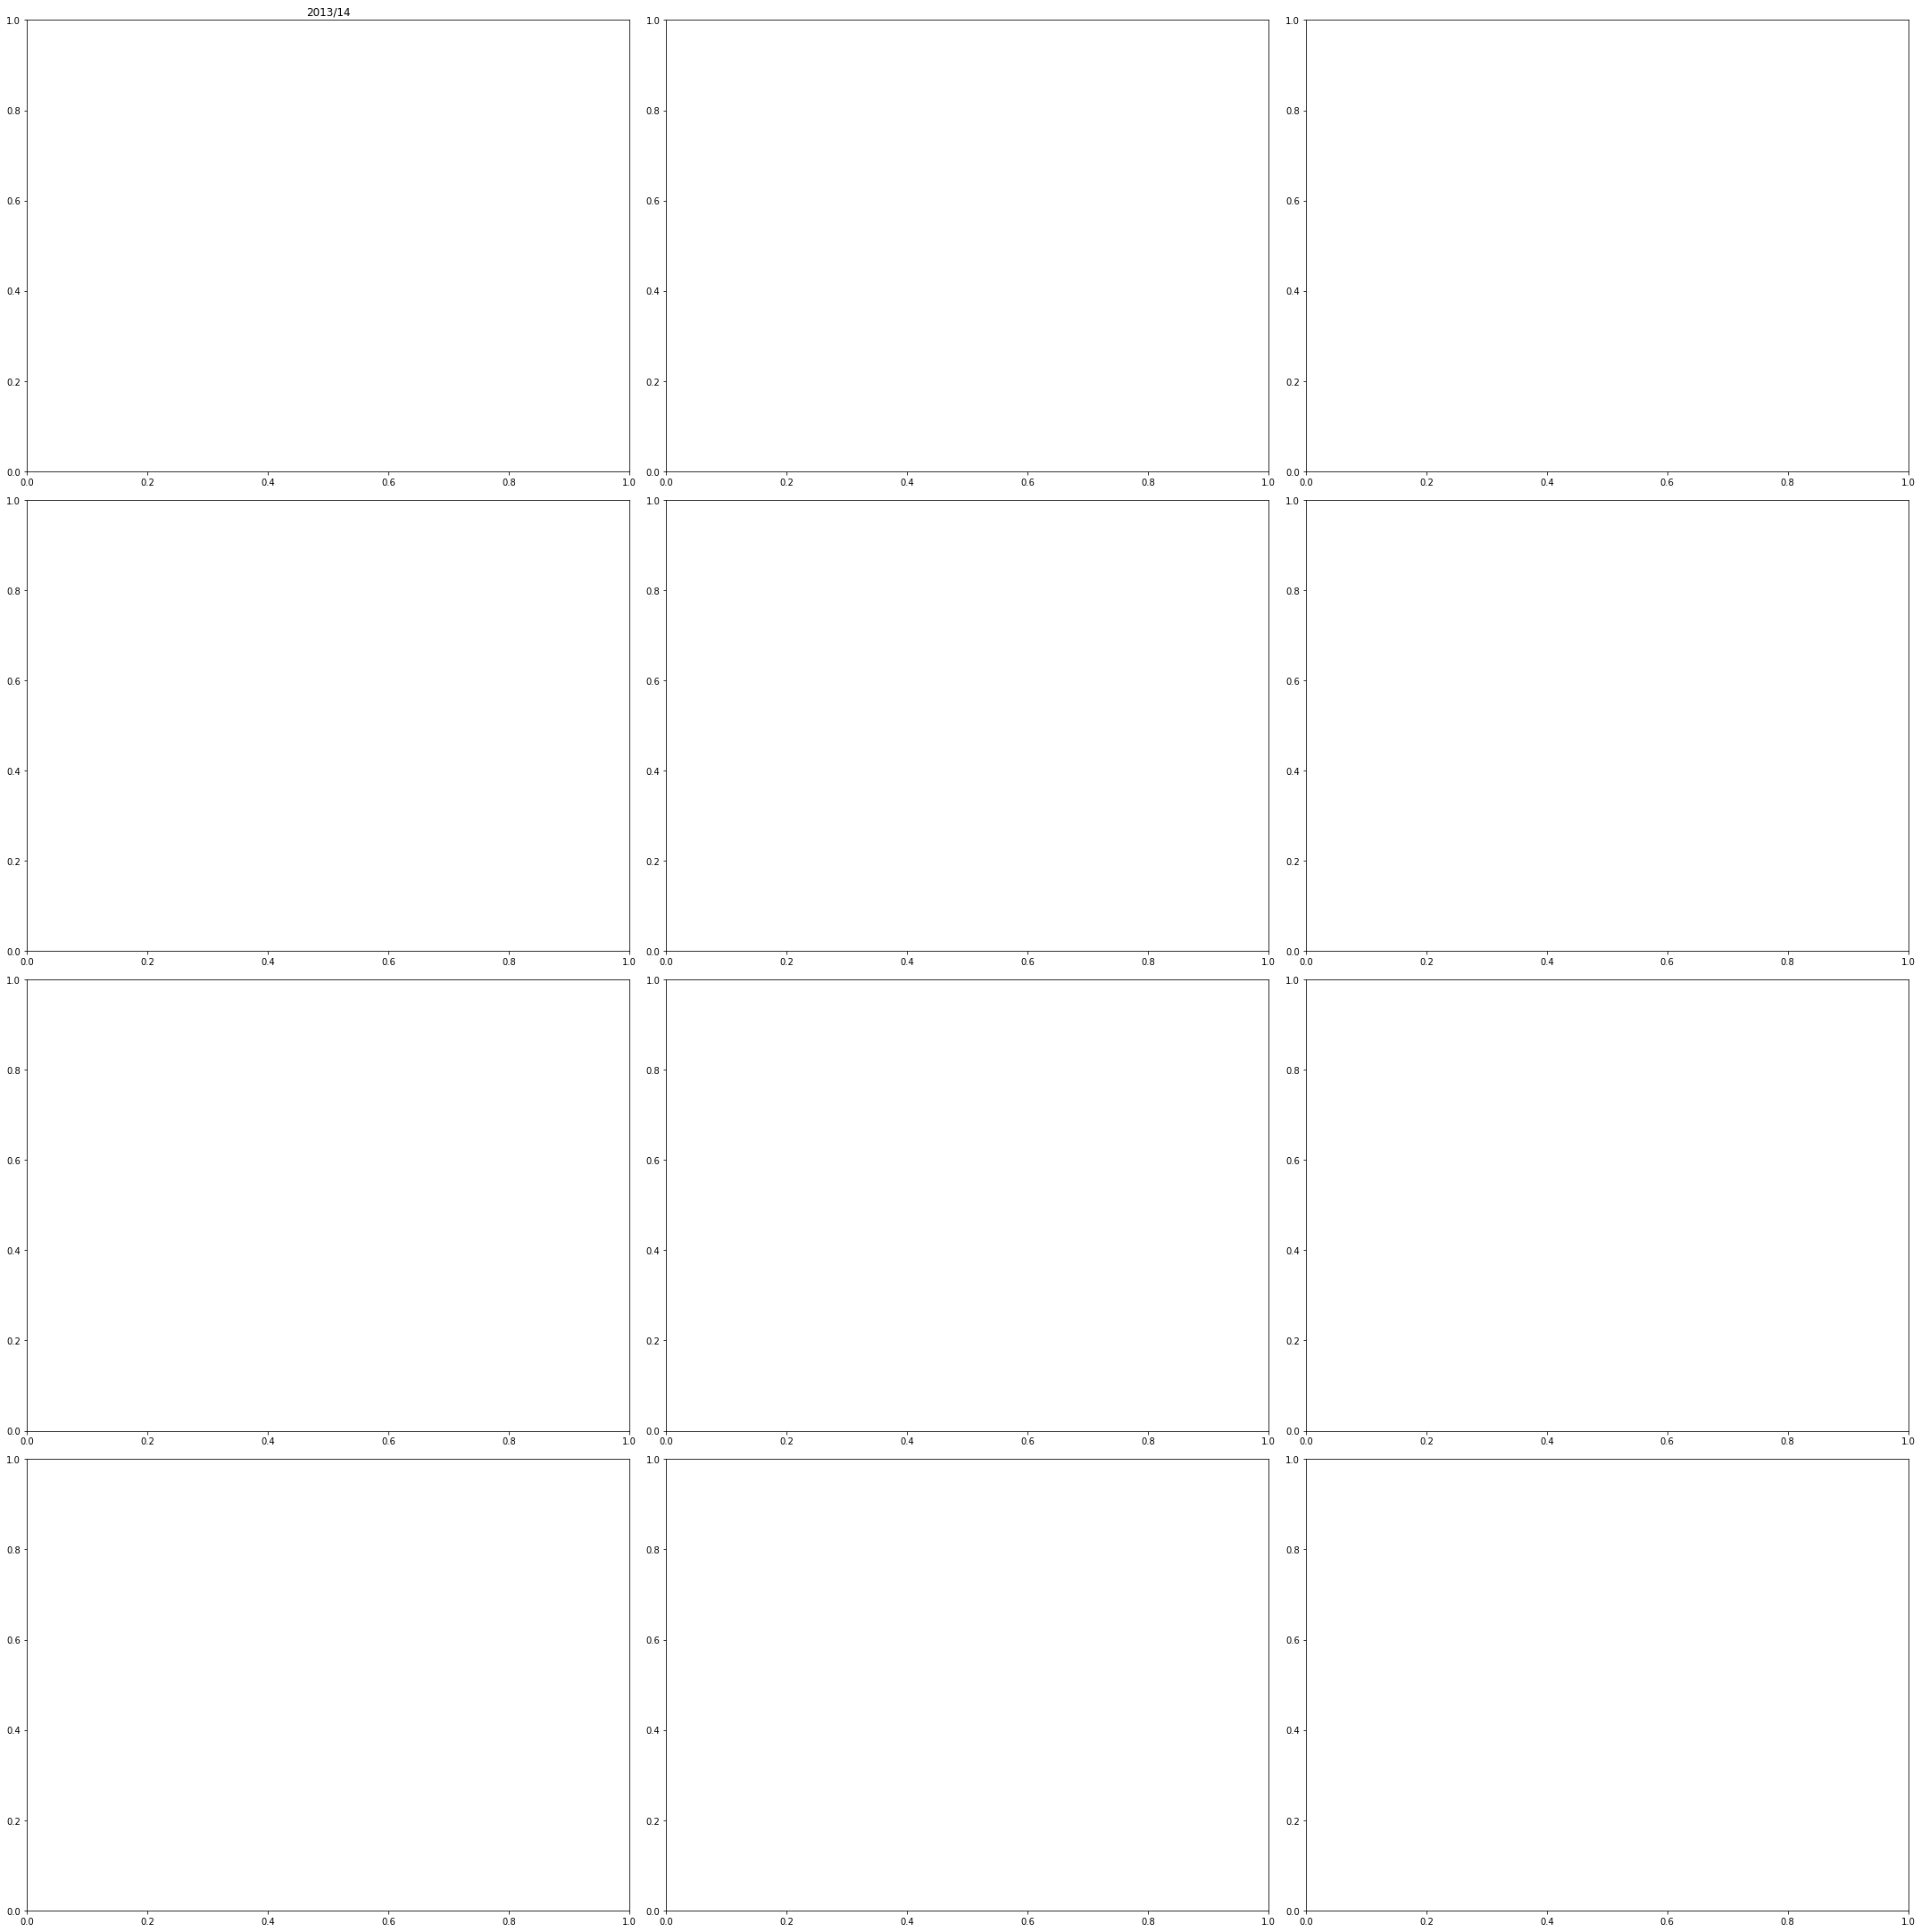

In [ ]:
# Ethnicity Based Arrests By Year

ethn = na_df.loc[ar_df['Ethnicity'] != 'All'].loc[ar_df['Gender'] == 'All'].loc[ar_df['Age_Group'] == 'All'].loc[ar_df['Geography'] == 'All'].copy()
ethn = ethn[['Time','Ethnicity']]
ethn = ethn.sort_values('Time')

# Plotting Values

et_fig,et_axes = plt.subplots(figsize=(30,30),nrows=4,ncols=3)
plt.tight_layout()

# Yearly Pie Chart
p = -22
for i in np.arange(0,4,1):
  for j in np.arange(0,3,1):
    p = p + 22
    q = p + 22
    et_axes[i,j].set_title(ethn['Time'].iloc[n])
    et_axes[i,j].pie(ethn.iloc[p:q,2],labels=ethn.iloc[p:q,1],autopct='%1.0f%%')

IndexError: ignored

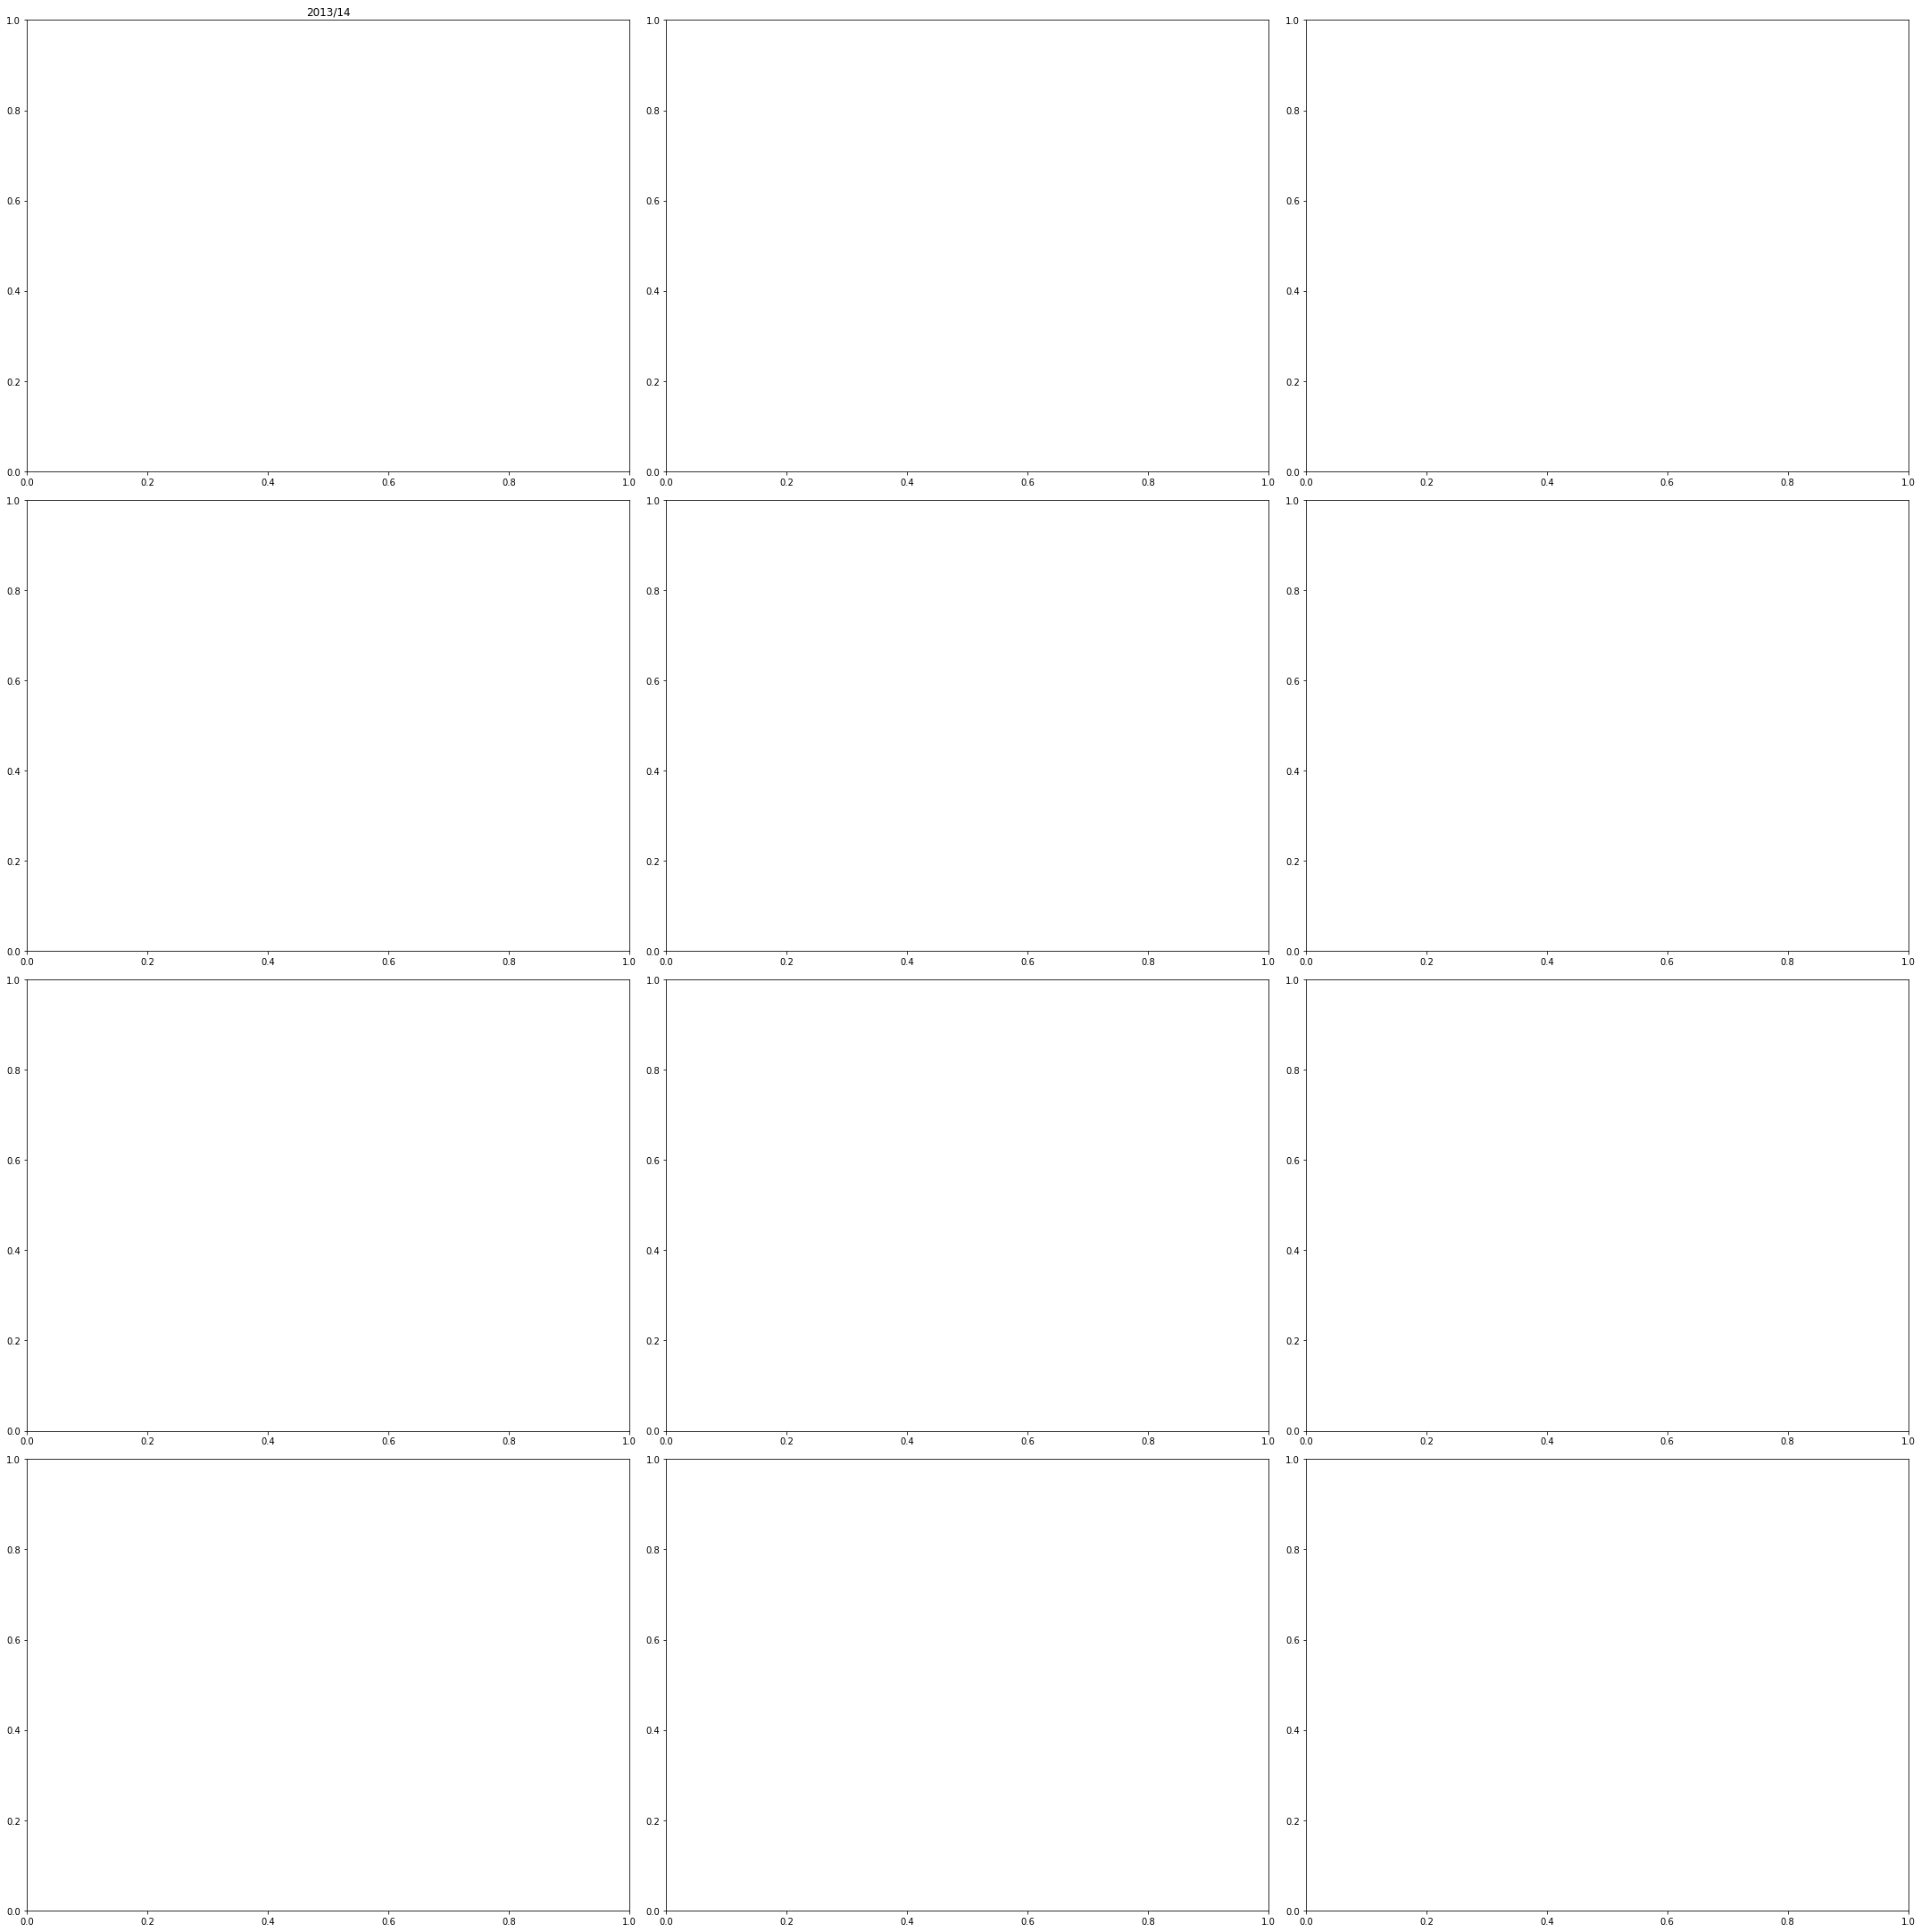

In [ ]:
# Checking for arrest pattern in the non-white ethnicities & Unreported 

ethn_new = ethn.loc[ethn['Ethnicity'] != 'White Irish'].loc[ethn['Ethnicity'] != 'White British'].loc[ethn['Ethnicity'] != 'White'].loc[ethn['Ethnicity'] != 'Any other white background'].loc[ethn['Ethnicity'] != 'Unreported'].copy()

# Plotting Values

et2_fig,et2_axes = plt.subplots(figsize=(30,30),nrows=4,ncols=3)
plt.tight_layout()

# Yearly Pie Chart
p = -17
for i in np.arange(0,4,1):
  for j in np.arange(0,3,1):
    p = p + 17
    q = p + 17
    et2_axes[i,j].set_title(ethn_new['Time'].iloc[p])
    et2_axes[i,j].pie(ethn_new.iloc[p:q,2],labels=ethn_new.iloc[p:q,1],autopct='%1.0f%%')

In [ ]:
# Plotting bar chart to estimate mean arrests of Non-White ethinicities

etdata = ethn_new.groupby('Ethnicity').mean().copy()
etdata.sort_values('n_arrests', inplace=True,ascending=False)
sns.barplot(etdata['n_arrests'],etdata.index, palette='Paired')

DataError: ignored